In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os
from zipfile import ZipFile

### Load and clean CitiBike data

In [16]:
# Open .zip files from Citibike and combine into single .csv (only do once)

source = '/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/data/'

# for item in os.listdir(source):
#     if item.endswith('.zip'):
#         file_name = source + item
#         zip_ref = ZipFile(file_name)
#         zip_ref.extractall(source)
#         os.remove(file_name)
#         zip_ref.close()

In [17]:
# os.chdir(source)

In [21]:
# Create list of files to combine

# extension = 'csv'
# all_files = [i for i in glob.glob('*.{}'.format(extension))]

# len(all_files)

12

In [22]:
# Combine files

# bike_file = pd.concat([pd.read_csv(f) for f in all_files])
# bike_file.to_csv('bike_trips_20.csv', index=False, encoding='utf-8-sig')

In [2]:
# Load single csv into pandas dataframe

bike_trips = pd.read_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/data/bike_trips_20.csv')

In [17]:
# Convert ride start and stop columns to datetime 

bike_trips['starttime'] = pd.to_datetime(bike_trips['starttime'])
bike_trips['stoptime'] = pd.to_datetime(bike_trips['stoptime'])

In [21]:
# Add month, day of month, day of week, and hour columns
# Weather comparisons will be based off of trip start time, not stop time

bike_trips['day_month'] = bike_trips['starttime'].dt.day
bike_trips['month'] = bike_trips['starttime'].dt.month
bike_trips['day_week'] = bike_trips['starttime'].dt.dayofweek
bike_trips['hour_day'] = bike_trips['starttime'].dt.hour

In [5]:
# function to create a hour of day colmun that takes the datetime as a parameter and converrts it a string
# the funcntion parses the string into the year, month, and day to combine it with the hour
# necessary for plotting

def date_to_hour(date):
    date = str(date)
    date = date.split(' ')
    hour = date[1].split(':')
    hour = hour[0]
    date = date[0]
    out_ = date + '-' + hour
    return out_

In [6]:
# Apply date_to_hour to starttimecolumn
# Create date_to_hour column to hold output

bike_trips['date_to_hour'] = bike_trips.apply(lambda x: date_to_hour(x['starttime']), axis=1)

In [7]:
# Convert new date_to_hour column to datetime with Year-Month-Day-Hour format

bike_trips['date_to_hour_dt'] = pd.to_datetime(bike_trips['date_to_hour'], format='%Y-%m-%d-%H')

#### Explore Citi Bike data 

In [ ]:
# Histogram of all 19.5 million+ trips by day 

fig, ax = plt.subplots(figsize=(14,10))

ax.hist(bike_trips['starttime'], bins=365)
ax.set_ylabel('Daily Trips')
ax.set_xlabel('Date')
ax.set_title('Daily CitiBike Trips, 2020');

In [10]:
# x and y for plot of rides against hour

ys = bike_trips.groupby('date_to_hour_dt').count()
xs = bike_trips['date_to_hour_dt'].unique()

In [ ]:
# Plot of trips against hour 

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(xs, ys['date_to_hour'])
ax.set_ylabel('Hourly Trips')
ax.set_xlabel('Date')
ax.set_title('Daily CitiBike Trips, 2020');

In [22]:
# Data for plots of rides in February

bike_feb = bike_trips[bike_trips['month'] == 2]

y_feb = bike_feb.groupby(bike_feb['date_to_hour_dt']).count()
x_feb = bike_feb['date_to_hour_dt'].unique()

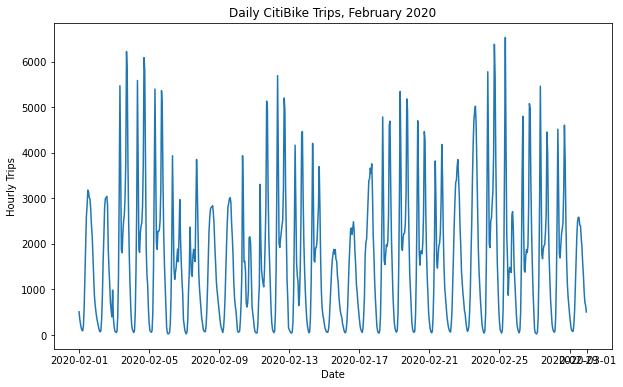

In [23]:
# Plots of rides in February

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_feb, y_feb['date_to_hour'])
ax.set_ylabel('Hourly Trips')
ax.set_xlabel('Date')
ax.set_title('Daily CitiBike Trips, February 2020');

In [591]:
# Data for plots of weekday rides in February

bike_feb_wk = bike_trips[(bike_trips['month'] == 2) & (bike_trips['day_week'] < 5)]

y_feb_wk = bike_feb_wk.groupby(bike_feb['date_to_hour_dt']).count()
x_feb_wk = bike_feb_wk['date_to_hour_dt'].unique()

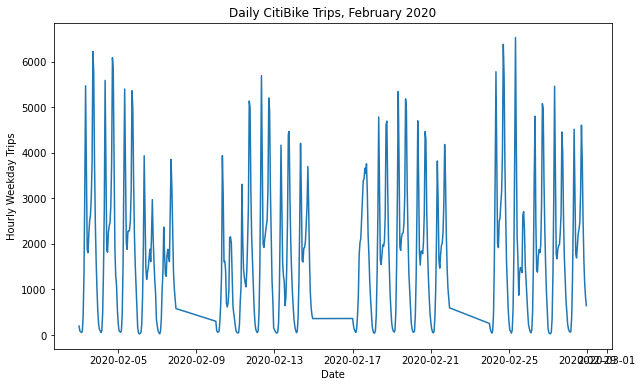

In [592]:
# Plot of weekday rides in February

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_feb_wk, y_feb_wk['date_to_hour'])
ax.set_ylabel('Hourly Weekday Trips')
ax.set_xlabel('Date')
ax.set_title('Daily CitiBike Trips, February 2020');

### Load and clean weather data 

In [30]:
# Load weather csv as a pandas dataframe

weather_df = pd.read_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/2019_2020_daily_weather.csv')

# To add: data types tags to import ex: pd.read_csv('data/x.csv', dtype={"user_id": int, "username": "string"})

/Users/jonleckie/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
# Source for codes: Federal Climate Complex Data Documentation for Integrated Surface Data:
#https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf

# Drop unnecessary columns and rename remaining columns from ISD codes to plain English

to_drop = ['AA2','AA3','AJ1', 'AL1','CALL_SIGN', 'CALL_SIGN.1', 
           'GA2','GA3','GE1','KB1','KG1','RH1','RH2','RH3', 'QUALITY_CONTROL',
          'STATION', 'NAME', 'LONGITUDE', 'LATITUDE', 'SOURCE', 'ELEVATION']

weather_df.drop(to_drop, axis=1, inplace=True)

weather_df.rename(columns={'TMP':'Temp, C', 
           'AA1':'Precipitation, cm', 
           'AW1': 'Present Obvs', 
           'OC1': 'Wind Gusts, m/s',
           'WND': 'Wind',
           'GD1': 'Cond, cat',
           'VIS': 'Visibility',
           'GA1': 'Cond, oktas'}, inplace=True)

In [32]:
# Convert date to datetime and add columns for day of month, month, year, day of week, and hour of day

weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

weather_df['Day_Month'] = weather_df['DATE'].dt.day
weather_df['Month'] = weather_df['DATE'].dt.month
weather_df['Year'] = weather_df['DATE'].dt.year
weather_df['Day_Week'] = weather_df['DATE'].dt.dayofweek
weather_df['Hour_Day'] = weather_df['DATE'].dt.hour

In [33]:
# Filter entire data set by FM-15 report type and year=2020. 
# Other report types exist in dataset. They are either daily/monthly summaries or inconsistent special reports. 
# FM-15 reports happen every hour on the 51st minute of the hour.
# Resulting dataframe has 8,787 rows 

weather_df = weather_df.loc[(weather_df['REPORT_TYPE'] == 'FM-15') & (weather_df['Year'] == 2020)]
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 11998 to 23568
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               8787 non-null   datetime64[ns]
 1   REPORT_TYPE        8787 non-null   object        
 2   Precipitation, cm  8737 non-null   object        
 3   Present Obvs       1126 non-null   object        
 4   DEW                8787 non-null   object        
 5   Cond, oktas        8462 non-null   object        
 6   Cond, cat          8510 non-null   object        
 7   Wind Gusts, m/s    1389 non-null   object        
 8   Temp, C            8787 non-null   object        
 9   Visibility         8787 non-null   object        
 10  Wind               8787 non-null   object        
 11  Day_Month          8787 non-null   int64         
 12  Month              8787 non-null   int64         
 13  Year               8787 non-null   int64         
 14  Day

In [34]:
# Functions to filter columns for proper info.
# Orginal entries are strings of numbers seperated by commas 
# Functions pull proper code from string and convert as necessary

# Convert celcius to fahrenheit
def C_to_F(num):
    return (num * (9/5)) + 32

# For temperature columns including dew point
def temp_col(temp):
    temp = temp.split(',')
    temp = temp[0].lstrip('+')
    temp = int(temp)/10 # some orginal data has a scaling factor of 10 
    temp = C_to_F(temp) 
    return temp

# Precipitation in mm
def precip_col(amt):
    if amt == '0':
        return 0
    else:
        amt = amt.split(',')
        return int(amt[1])/10

# Conditions, oktas
def get_oktas(okta):
    okta = okta.split(',')
    if okta[0] == '99':
        return '0'
    return okta[0]

# Convert wind gusts to ints and mph
def get_gusts(gust):
    gust = gust.split(',')
    mph = int(gust[0]) * 2.237
    return mph / 10

In [35]:
# 'Present Obvs' involves categorical observations pulled from the Federal Climate Complex Data Documentation 

conds = ['0 = No significant weather observe',
 '1 = Clouds generally dissolving or becoming less developed',
 '2 = State of sky on the whole unchanged during the past hour',
 '3 = Clouds generally forming or developing during the past hour',
 '4 = Haze, smoke, or dust in suspension in the air, visibility equal to or greater than 1km',
 '5 = Smoke',
 '7 = Dust or sand raised by wind at or near the station',
 '10 = Mist',
 '11 = Diamond dust',
 '12 = Distant lightning',
 '18 = Squalls',
 '20 = Fog',
 '21 = Precipitation',
 '22 = Drizzle (not freezing) or snow grains',
 '23 = Rain (not freezing)',
 '24 = Snow',
 '25 = Freezing drizzle or freezing rain',
 '26 = Thunderstorm (with or without precipitation)',
 '27 = Blowing or drifting snow or sand',
 '28 = Blowing or drifting snow or sand, visibility equal to or greater than 1 km',
 '29 = Blowing or drifting snow or sand, visibility less than 1 km',
 '30 = Fog',
 '31 = Fog or ice fog in patches',
 '32 = Fog or ice fog, has become thinner during the past hour',
 '33 = Fog or ice fog, no appreciable change during the past hour',
 '34 = Fog or ice fog, has begun or become thicker during the past hour',
 '35 = Fog, depositing rime',
 '40 = Precipitation',
 '41 = Precipitation, slight or moderate',
 '42 = Precipitation, heavy',
 '43 = Liquid precipitation, slight or moderate',
 '44 = Liquid precipitation, heavy',
 '45 = Solid precipitation, slight or moderate',
 '46 = Solid precipitation, heavy',
 '47 = Freezing precipitation, slight or moderate',
 '48 = Freezing precipitation, heavy',
 '50 = Drizzle',
 '51 = Drizzle, not freezing, slight',
 '52 = Drizzle, not freezing, moderate',
 '53 = Drizzle, not freezing, heavy',
 '54 = Drizzle, freezing, slight',
 '55 = Drizzle, freezing, moderate',
 '56 = Drizzle, freezing, heavy',
 '57 = Drizzle and rain, slight',
 '58 = Drizzle and rain, moderate or heavy',
 '60 = Rain',
 '61 = Rain, not freezing, slight',
 '62 = Rain, not freezing, moderate',
 '63 = Rain, not freezing, heavy',
 '64 = Rain, freezing, slight',
 '65 = Rain, freezing, moderate',
 '66 = Rain, freezing, heavy',
 '67 = Rain or drizzle and snow, slight',
 '68 = Rain or drizzle and snow, moderate or heavy',
 '70 = Snow',
 '71 = Snow, slight',
 '72 = Snow, moderate',
 '73 = Snow, heavy',
 '74 = Ice pellets, slight',
 '75 = Ice pellets, moderate',
 '76 = Ice pellets, heavy',
 '77 = Snow grains',
 '78 = Ice crystals',
 '80 = Showers or intermittent precipitation',
 '81 = Rain showers or intermittent rain, slight',
 '82 = Rain showers or intermittent rain, moderate',
 '83 = Rain showers or intermittent rain, heavy',
 '84 = Rain showers or intermittent rain, violent',
 '85 = Snow showers or intermittent snow, slight',
 '86 = Snow showers or intermittent snow, moderate',
 '87 = Snow showers or intermittent snow, heavy',
 '89 = Hail',
 '90 = Thunderstorm',
 '91 = Thunderstorm, slight or moderate, with no precipitation',
 '92 = Thunderstorm, slight or moderate, with rain showers and/or snow showers',
 '93 = Thunderstorm, slight or moderate, with hail',
 '94 = Thunderstorm, heavy, with no precipitation',
 '95 = Thunderstorm, heavy, with rain showers and/or snow',
 '96 = Thunderstorm, heavy, with hail',
 '99 = Tornado']

# Converts above into a dictionary for mapping across dataframe
# Dataframe contains numbers corresponding to the dictionary's keys. 
conditions_dict = {}
for cond in conds:
    cond = cond.split('=')
    conditions_dict[cond[0].strip()] = cond[1].strip()

# Function to pull correct condition code from orginal column entry
def clean_conditions(cond):
    if cond == '0':
        return cond
    elif type(cond) == type('str'):
        cond = cond.split(',')
        return cond[0].strip()

In [36]:
# Categorical observatioins for cloud cover 

covers = ['0 = Clear - No coverage',
 '1 = FEW - 2/8 or less coverage (not including zero)',
 '2 = SCATTERED - 3/8-4/8 coverage',
 '3 = BROKEN - 5/8-7/8 coverage',
 '4 = OVERCAST - 8/8 coverage',
 '5 = OBSCURED',
 '6 = PARTIALLY OBSCURED',
 '9 = MISSING']

# Dictionarry of above list to map to column 
cover_dict = {}
for cover in covers:
    cover = cover.split('=')
    cover_dict[cover[0].strip()] = cover[1].strip()

In [37]:
# Application of cleaning/converting functions above

# Precipitation, mm        
weather_df['Precipitation, cm'].fillna('0', inplace=True)
weather_df['Precip, mm'] = weather_df['Precipitation, cm'].apply(precip_col)

# Present Obvs       
weather_df['Present Obvs'].fillna('0', inplace=True)
weather_df['Obvs'] = weather_df['Present Obvs'].apply(clean_conditions)
weather_df['Obvs'] = weather_df['Obvs'].map(conditions_dict)

# DEW                     
weather_df['Dew Point'] = weather_df['DEW'].apply(temp_col)

# Cond, oktas 
weather_df['Cond, oktas'].fillna('0', inplace=True)
weather_df['Cond #'] = weather_df['Cond, oktas'].apply(get_oktas)

# Cond, cat   
weather_df['Cond, cat'].fillna('0', inplace=True)
weather_df['Condition'] = weather_df['Cond, cat'].apply(clean_conditions)
weather_df['Condition'] = weather_df['Condition'].map(cover_dict)

# Wind Gusts
weather_df['Wind Gusts, m/s'].fillna('0', inplace=True)
weather_df['Winds'] = weather_df['Wind Gusts, m/s'].apply(get_gusts)

# Temp, F
weather_df['Temp,F'] = weather_df['Temp, C'].apply(temp_col)

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 11998 to 23568
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               8787 non-null   datetime64[ns]
 1   REPORT_TYPE        8787 non-null   object        
 2   Precipitation, cm  8787 non-null   object        
 3   Present Obvs       8787 non-null   object        
 4   DEW                8787 non-null   object        
 5   Cond, oktas        8787 non-null   object        
 6   Cond, cat          8787 non-null   object        
 7   Wind Gusts, m/s    8787 non-null   object        
 8   Temp, C            8787 non-null   object        
 9   Visibility         8787 non-null   object        
 10  Wind               8787 non-null   object        
 11  Day_Month          8787 non-null   int64         
 12  Month              8787 non-null   int64         
 13  Year               8787 non-null   int64         
 14  Day

In [38]:
columns = ['DATE', 'Temp,F', 'Precip, mm', 'Dew Point', 'Winds', 'Cond #', 
           'Condition', 'Obvs', 'Day_Month', 'Month', 'Year', 'Day_Week', 'Hour_day']

weather_clean = weather_df[['DATE','Temp,F','Precip, mm','Dew Point','Winds','Cond #','Condition','Obvs','Day_Month','Month','Year', 'Day_Week','Hour_Day']]

#### Exploring the weather data 

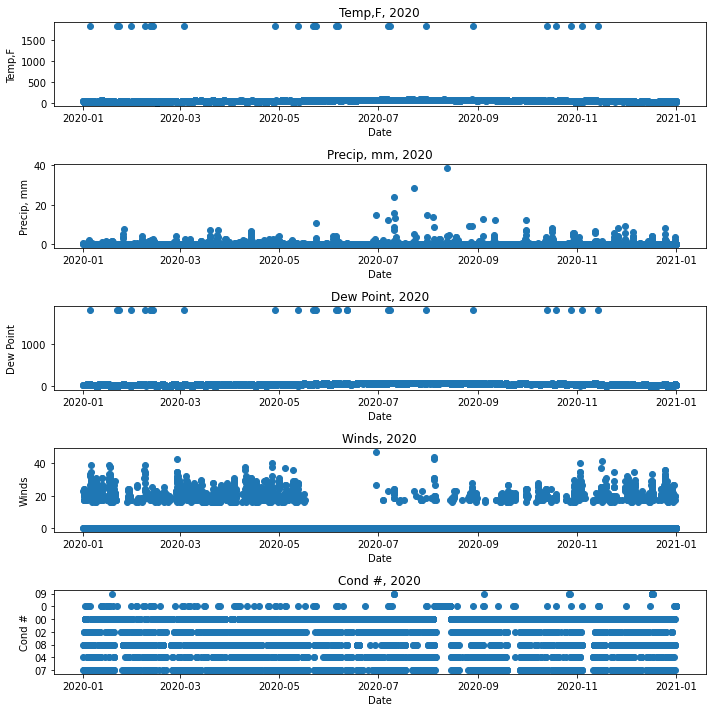

In [39]:
# Scatter plots of weather conditions against time 

fig, axs = plt.subplots(5, figsize=(10,10))

xs = weather_clean['DATE']
ys = ['Temp,F', 'Precip, mm', 'Dew Point', 'Winds', 'Cond #']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(weather_clean['DATE'], weather_clean[ys[i]])
    ax.set_xlabel('Date')
    ax.set_ylabel(ys[i])
    ax.set_title(f'{ys[i]}, 2020')
    
fig.tight_layout();

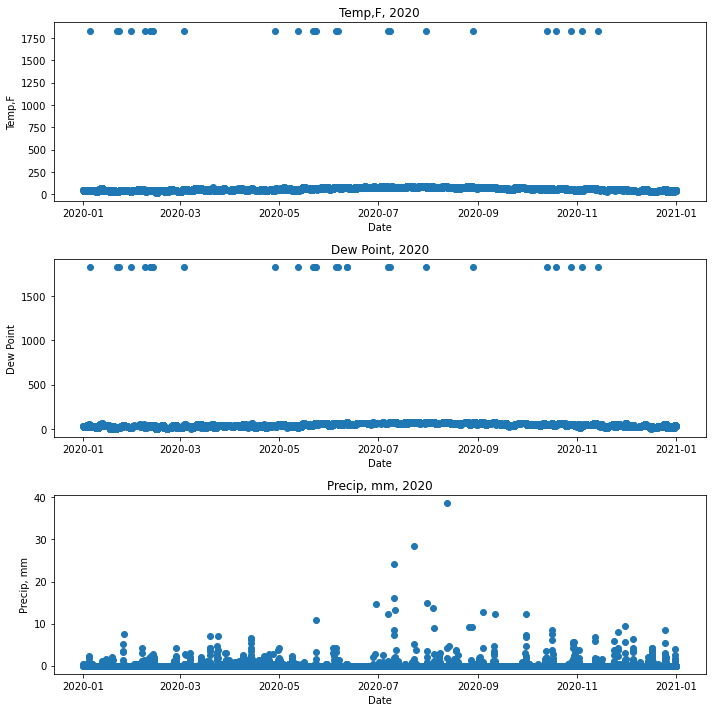

In [1005]:
# Scatter plots of temp, dew point, and rain only

fig, axs = plt.subplots(3, figsize=(10,10))

xs = weather_clean['DATE']
ys = ['Temp,F', 'Dew Point', 'Precip, mm']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(weather_clean['DATE'], weather_clean[ys[i]])
    ax.set_xlabel('Date')
    ax.set_ylabel(ys[i])
    ax.set_title(f'{ys[i]}, 2020')
    
fig.tight_layout();

In [384]:
# Reviewing temp data for extreme values
# max = 1831.82

weather_clean['Temp,F'].describe()

count    8787.000000
mean       62.045702
std        95.884293
min        15.080000
25%        44.060000
50%        55.940000
75%        71.060000
max      1831.820000
Name: Temp,F, dtype: float64

In [397]:
# How many extreme temps?

len(weather_clean[weather_clean['Temp,F'] >= 110])

25

In [448]:
# How many extreme dew points?

len(weather_clean[weather_clean['Dew Point'] > 110])

27

In [585]:
# Checking df entries where temp is geater than 110

weather_clean[weather_clean['Temp,F'] >= 110]

print('Checking df entries where weather is geater than 110')

Checking df entries where weather is geater than 110


In [400]:
# Crreating copy of weather data for merging and exploring extreme temps

weather_copy = weather_clean.copy() 

In [519]:
# Getting indexes of extreme values 

ex_idxs_temp = list(weather_copy[weather_clean['Temp,F'] >= 110].index)
ex_idx_dew = list(weather_clean[weather_clean['Dew Point'] > 110].index)

print(f'Temp count = {len(ex_idxs_temp)}, Dew count = {len(ex_idx_dew )}')

Temp count = 25, Dew count = 27


In [583]:
# Checking for indicies of additional dew point values
# Indices 17162 and 17163 = additional dew point values

weather_clean[weather_clean['Dew Point'] > 110]

print('Indices 17162 and 17163 = additional dew point values')

Indices 17162 and 17163 = additional dew point values


### Merging Bike and Weather Dataframes

In [43]:
# Merge weather and bike dfs into a single df

bike_weather = pd.merge(bike_trips, weather_clean, how='left', 
                        left_on=['month', 'day_month', 'hour_day'], 
                        right_on=['Month','Day_Month', 'Hour_Day'])

In [44]:
bike_weather.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19511109 entries, 0 to 19511108
Data columns (total 34 columns):
 #   Column                   Non-Null Count     Dtype         
---  ------                   --------------     -----         
 0   tripduration             19511109 non-null  int64         
 1   starttime                19511109 non-null  datetime64[ns]
 2   stoptime                 19511109 non-null  datetime64[ns]
 3   start station id         19511109 non-null  int64         
 4   start station name       19511109 non-null  object        
 5   start station latitude   19511109 non-null  float64       
 6   start station longitude  19511109 non-null  float64       
 7   end station id           19511109 non-null  int64         
 8   end station name         19511109 non-null  object        
 9   end station latitude     19511109 non-null  float64       
 10  end station longitude    19511109 non-null  float64       
 11  bikeid                   19511109 non-null  int6

In [45]:
# Create new df with needed columns

bike_weather_clean = bike_weather[['tripduration','starttime','stoptime','start station id','end station id','bikeid','usertype','birth year','gender','Temp,F','Precip, mm','Dew Point','Winds','Cond #','Condition','Obvs','Year','Month','Day_Month','Day_Week','Hour_Day', 'date_to_hour_dt']]

#### Explore Merged Dataframe

In [50]:
# FUNCTIONS FOR CHARTING RIDES, TEMP, DEW, RAIN, AGAINST TIME

# return data frames according to period.
# if day_low and day_high are equal, return month period, else returns 
def get_period(month, day_low, day_high):
    df_month = bike_weather_clean[(bike_weather_clean['Month'] == month)]
    df_period = bike_weather_clean[(bike_weather_clean['Month'] == month) & (bike_weather_clean['Day_Month'] > day_low) & (bike_weather_clean['Day_Month'] < day_high)]
    if day_low == day_high:
        return df_month
    elif day_low > day_high:
        return 'ADJUST DAYS, low > high'
    else:
        return df_period 
        
# returns y and x values for charting dew, rides, temp, and rain against time
def get_y(df):
    dew_y  = []
    ride_y = []
    temp_y = []
    rain_y = []
    out    = []
    x_s = df['date_to_hour_dt'].unique()

    for hour in x_s:
        x_hours = df[df['date_to_hour_dt'] == hour]
        dew_point_y = x_hours['Dew Point'].mean()
        temp_point_y = x_hours['Temp,F'].mean()
        rain_point_y = x_hours['Precip, mm'].mean()
        num_rides_y = len(x_hours)
        ride_y.append(num_rides_y)
        rain_y.append(rain_point_y)
        temp_y.append(temp_point_y)
        dew_y.append(dew_point_y)

    for i, y in enumerate(dew_y):
        if y > 120:
            dew_y[i] = (dew_y[i-1] + dew_y[i+1])/2

    for i, y in enumerate(temp_y):
        if y > 120:
            temp_y[i] = (temp_y[i-1] + temp_y[i+1])/2
    
    out.append(x_s)
    out.append(ride_y)
    out.append(temp_y)
    out.append(dew_y)
    out.append(rain_y)
    
    return out


# chart dew, rides, temp, and rain against time
def chart_ride_weather(xy_lst, ax, date_range):
    ax2 = ax.twinx()
    ax.plot(xy_lst[0], xy_lst[1], color='blue', label='Bike Trips', lw=1) # rides by hour
    ax.set_ylabel('Hourly Trips')
    ax.set_xlabel('Date')
    ax.set_title(f'Daily CitiBike Trips, {date_range}, 2020');
    ax2.plot(xy_lst[0], xy_lst[2], color='red', label='Temp(F)', lw=2)
    ax2.plot(xy_lst[0], xy_lst[3], color='orange', label='Dew Point', lw=2)
    ax2.plot(xy_lst[0], xy_lst[4], color='brown', label='Rain', lw=2)
    ax2.set_ylabel('Temp(F)/Dew Point/Rain(mm)')
    ax.legend(loc='lower left')
    ax2.legend(loc='upper left')

# wrap for functions above
# works like a zoom on the monthly chart
def chart_period(month, day_low, day_high):
    fig, ax = plt.subplots(figsize=(10, 6))
    period = get_period(month, day_low, day_high)
    points = get_y(period)
    chart = chart_ride_weather(points, ax, f'{month}/{day_low + 1} - {month}/{day_high - 1}')

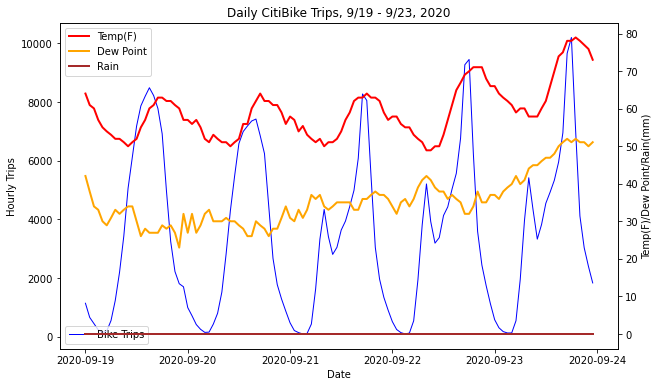

In [53]:
# Use chart_period(month, day_low, day_high) to hourly counts of trips, temp, dew point and rain against time
# First argument is the month, start day of period (not inclusive), thrid is stop day of period (not inclusive)
# For full month, enter the same value for start and end day 
# Parameters used in README are: (9, 18, 24) and (8, 11, 13)

chart_period(9, 18, 24)

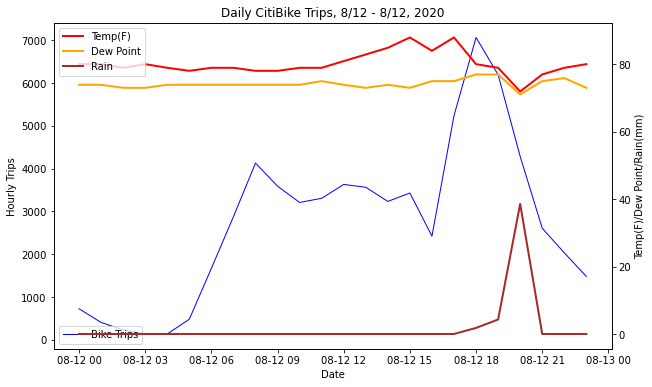

In [54]:
chart_period(8, 11, 13)

In [55]:
# Get lists of condtions at hour of # of rides, temps, dew, and rain for further exploration 

hour, rides, temps, dew, rain = get_y(bike_weather_clean)

In [56]:
# fuction to plot each condition against rides

def chart_rides_cond(ride_list, condition, cond_str):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(condition, ride_list)
    ax.set_xlabel(f'{cond_str}')
    ax.set_ylabel('Rides/hour')
    ax.set_title(f'Rides/Hour vs. {cond_str}')

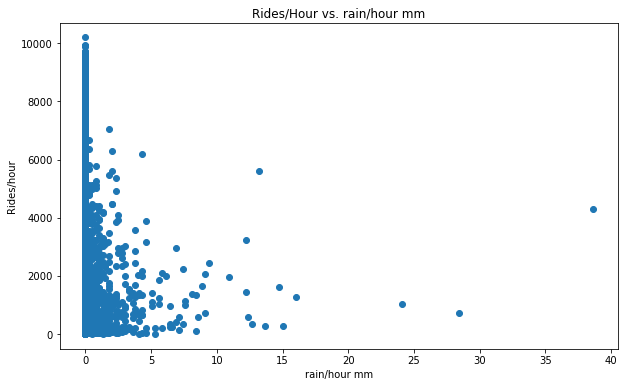

In [57]:
chart_rides_cond(rides, rain, 'rain/hour mm')

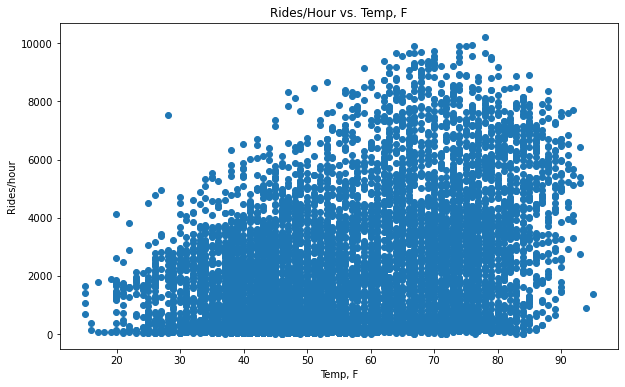

In [58]:
chart_rides_cond(rides, temps, 'Temp, F')

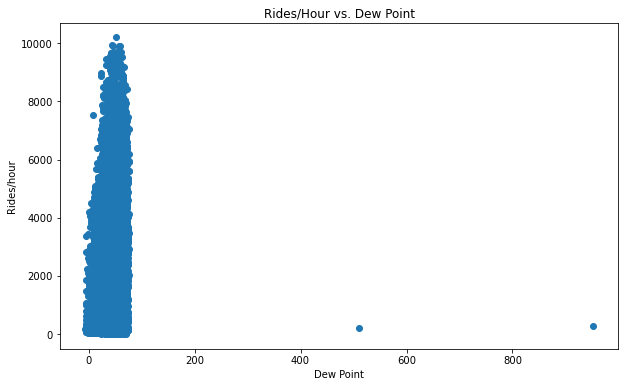

In [59]:
# returns several outliers 

chart_rides_cond(rides, dew,'Dew Point')

In [67]:
# fix dew outliers with averaging method
# The highest dew point ever recorded, 95°F

for idx, point in enumerate(dew):
    if point > 95:
        dew[idx] = (dew[idx-1] + dew[idx+1])/2

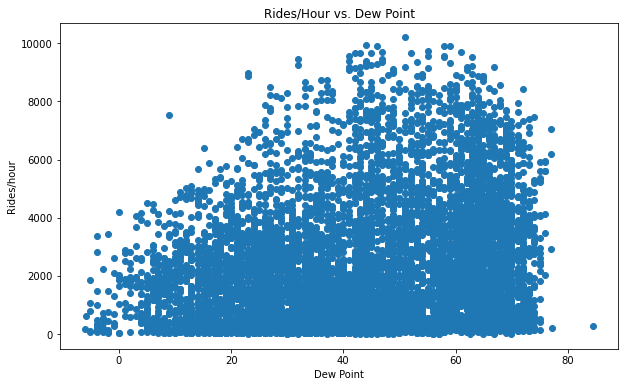

In [68]:
chart_rides_cond(rides, dew,'Dew Point')

In [70]:
# Historgrams

def hist_rides_cond(condition, cond_str, bins=50):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(condition, bins=bins)
    ax.set_xlabel(f'{cond_str}')
    ax.set_ylabel('Hours')
    ax.set_title(f'# of Hours vs. {cond_str}')

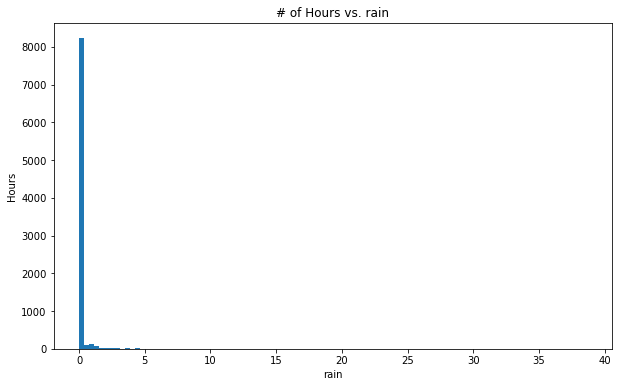

In [71]:
hist_rides_cond(rain, 'rain', 100)

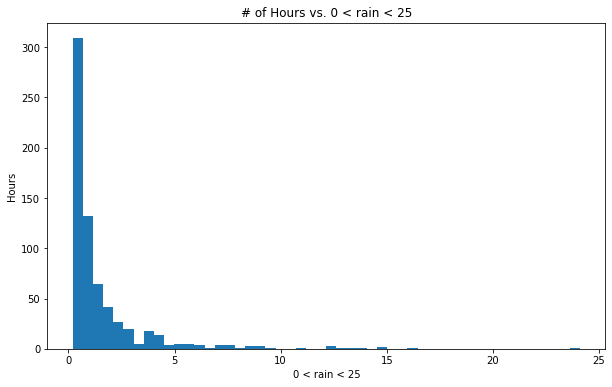

In [72]:
# Filtering out hours with no rain 

rain_gt0 = [r for r in rain if r > 0]
rain_gt1 = [r for r in rain if r > 1]
rain_lt25 = [r for r in rain if r < 25 and r > 0]  

hist_rides_cond(rain_lt25, '0 < rain < 25', 50)

In [73]:
# Counting hours with no rain vs any rain and other amounts

rain_0 = [r for r in rain if r == 0]
rain_gt25 = [r for r in rain if r > 25]
print(f'# 0s = {len(rain_0)}, >0 = {len(rain_gt0)}, >1 = {len(rain_gt1)}, < 25 = {len(rain_lt25)}, < 25 = {len(rain_gt25)}')

# 0s = 8033, >0 = 679, >1 = 238, < 25 = 677, < 25 = 2


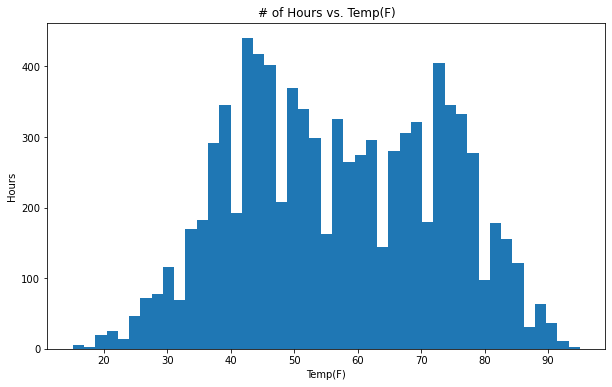

In [74]:
hist_rides_cond(temps, 'Temp(F)', 45)

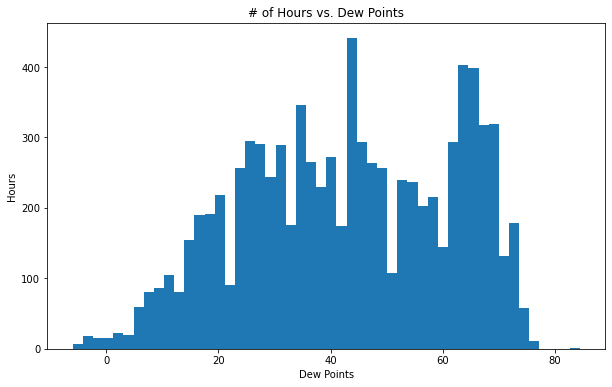

In [75]:
hist_rides_cond(dew, 'Dew Points', 50)

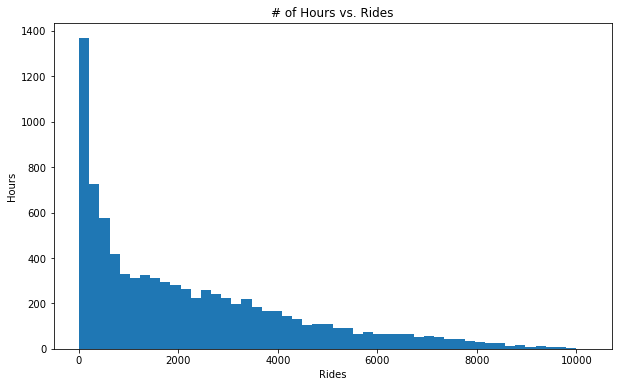

In [76]:
hist_rides_cond(rides, 'Rides')

In [77]:
# bar charts of rides vs conditions

def bar_rides_cond(condition, cond_str):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(condition, rides)
    ax.set_xlabel(f'{cond_str}')
    ax.set_ylabel('Rides')
    ax.set_title(f'# of Rides vs. {cond_str}')

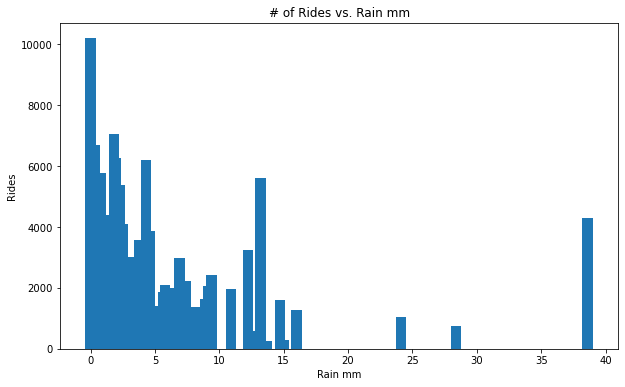

In [78]:
bar_rides_cond(rain, 'Rain mm')

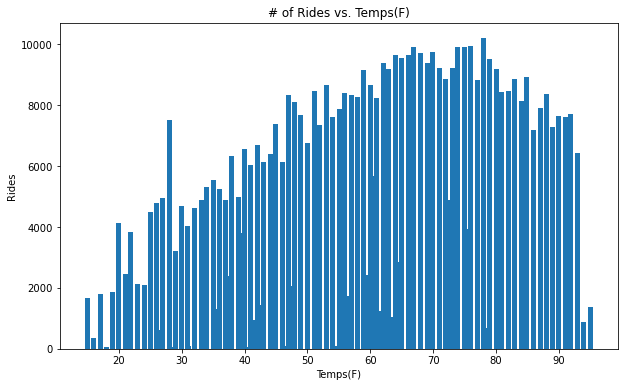

In [79]:
bar_rides_cond(temps, 'Temps(F)')

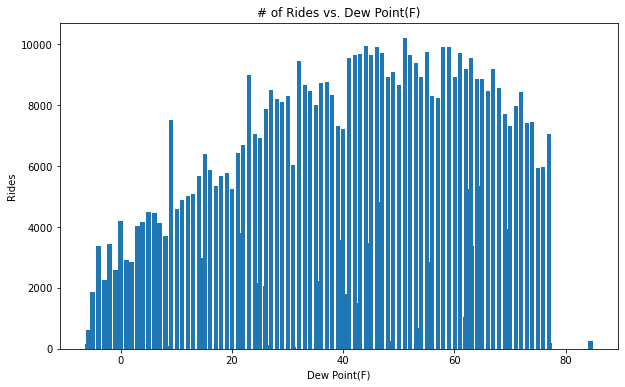

In [81]:
bar_rides_cond(dew, 'Dew Point(F)')

In [89]:
# Creating groups/buckets of condition levels 


# Tuples of weather conditions and ridess 
dew_ride_zip  = zip(dew, rides)
rain_ride_zip = zip(rain, rides)
temp_ride_zip = zip(temps, rides)


# Buckets of Dew Points:
dew_low  = []
dew_mid  = []
dew_high = []

for tup in dew_ride_zip:
    if tup[0] <= 55:
        dew_low.append(tup)
    elif tup[0] >= 65:
        dew_high.append(tup)
    else:
        dew_mid.append(tup)
        
# dew_low  = [tup for tup in dew_ride_zip if tup[0] <= 55]
# dew_mid  = [tup for tup in dew_ride_zip if tup[0] > 55 and tup[0] < 65]
# dew_high = [tup for tup in dew_ride_zip if tup[0] >= 65]
    
# Buckets of Rain 
no_rain    = []
any_rain   = []

for tup in rain_ride_zip:
    if tup[0] == 0:
        no_rain.append(tup)
    elif tup[0] > 0:
        any_rain.append(tup)


# Buckets of Temp:
temp_hot  = []
temp_mod  = []
temp_cold = []

for tup in temp_ride_zip:
    if tup[0] >= 75:
        temp_hot.append(tup)
    elif tup[0] <= 60:
        temp_cold.append(tup)
    else:
        temp_mod.append(tup)


print(f'# of Dew measurements: low: {len(dew_low)}, mid: {len(dew_mid)}, high: {len(dew_high)}')
print(f'# of Rain measurements: no rain: {len(no_rain)}, any_rain: {len(any_rain)}')
print(f'# of Temp measurements: cold: {len(temp_cold)}, mod: {len(temp_mod)}, hot: {len(temp_hot)}')

# of Dew measurements: low: 5927, mid: 1566, high: 1219
# of Rain measurements: no rain: 8033, any_rain: 679
# of Temp measurements: cold: 4854, mod: 2399, hot: 1459


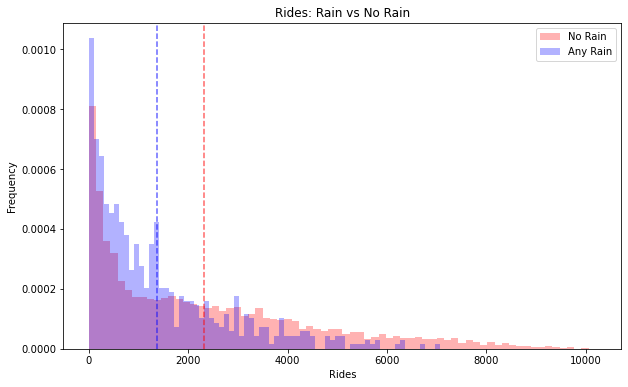

In [91]:
# Normalized histograms of ride frequency in rain and no rain

fix, ax = plt.subplots(figsize=(10, 6))

no_rain_rides  = [tup[1] for tup in no_rain]
any_rain_rides = [tup[1] for tup in any_rain]

avg_no_rain = sum(no_rain_rides) / len(no_rain_rides)
avg_rain_rides= sum(any_rain_rides) / len(any_rain_rides)

ax.hist(no_rain_rides, color='red', alpha=.3, label='No Rain', bins=70, density=True)
ax.hist(any_rain_rides, color='blue', alpha=.3, label='Any Rain', bins=70, density=True)
ax.set_ylabel('Frequency')
ax.set_xlabel('Rides')
ax.set_title('Rides: Rain vs No Rain')
ax.axvline(avg_no_rain, color='red', linestyle='--', alpha=.6)
ax.axvline(avg_rain_rides, color='blue', linestyle='--', alpha=.6)
ax.legend();

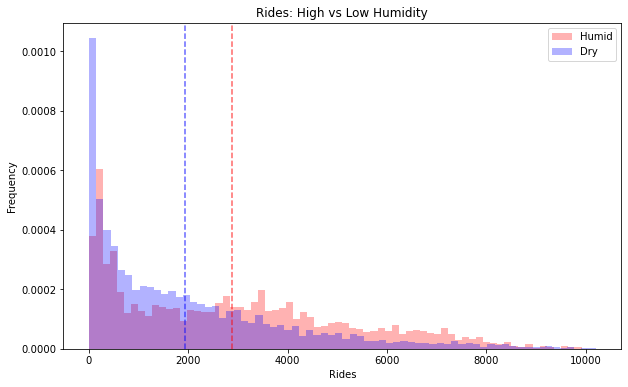

In [92]:
# Normalized histograms of ride frequency in high and low humidity

fix, ax = plt.subplots(figsize=(10,6))

dew_highmod = dew_high + dew_mid

dew_high_rides = [tup[1] for tup in dew_highmod]
dew_low_rides  = [tup[1] for tup in dew_low]

avg_high_dew = sum(dew_high_rides) / len(dew_high_rides)
avg_low_dew  = sum(dew_low_rides) / len(dew_low_rides)

ax.hist(dew_high_rides, color='red', alpha=.3, label='Humid', bins=70, density=True)
ax.hist(dew_low_rides, color='blue', alpha=.3, label='Dry', bins=70, density=True)
ax.set_ylabel('Frequency')
ax.set_xlabel('Rides')
ax.set_title('Rides: High vs Low Humidity')
ax.axvline(avg_high_dew, color='red', linestyle='--', alpha=.6)
ax.axvline(avg_low_dew, color='blue', linestyle='--', alpha=.6)
ax.legend();

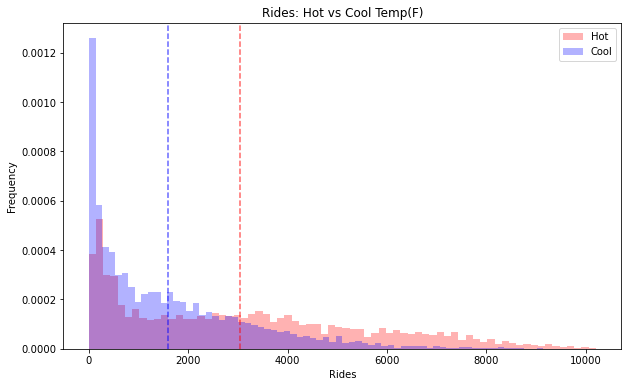

In [93]:
# Normalized histograms of ride frequency in hot and cool temps

fix, ax = plt.subplots(figsize=(10,6))

temp_highmod = temp_hot + temp_mod

temp_high_rides = [tup[1] for tup in temp_highmod]
temp_low_rides  = [tup[1] for tup in temp_cold]

avg_high_temp = sum(temp_high_rides) / len(temp_high_rides)
avg_low_temp  = sum(temp_low_rides) / len(temp_low_rides)

ax.hist(temp_high_rides, color='red', alpha=.3, label='Hot', bins=70, density=True)
ax.hist(temp_low_rides, color='blue', alpha=.3, label='Cool', bins=70, density=True)
ax.set_ylabel('Frequency')
ax.set_xlabel('Rides')
ax.set_title('Rides: Hot vs Cool Temp(F)')
ax.axvline(avg_high_temp, color='red', linestyle='--', alpha=.6)
ax.axvline(avg_low_temp, color='blue', linestyle='--', alpha=.6)
ax.legend();

In [94]:
# Welch's t-tests

temp_welch = stats.ttest_ind(temp_high_rides, temp_low_rides, equal_var= False)
dew_welch  = stats.ttest_ind(dew_high_rides, dew_low_rides, equal_var= False)
rain_welch = stats.ttest_ind(no_rain_rides, any_rain_rides, equal_var= False)

In [95]:
# Results for dew point

dew_welch

Ttest_indResult(statistic=18.61604564009955, pvalue=9.780001451639427e-75)

In [96]:
# Results for raiin

rain_welch

Ttest_indResult(statistic=16.34019738935716, pvalue=2.293253491572896e-53)

In [97]:
# Results for rain

temp_welch

Ttest_indResult(statistic=31.923830647772675, pvalue=1.9517356662769365e-207)